# Visualize results of code metrics analyzer

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [366]:
bumpy_data = {}
fpc_data = {}
lcom5_data = {}
lcom4_data = {}
loc_data = {}

filepath = "../public_analysis_results.json"
with open(filepath, "r") as file:
    json_object = json.load(file)

    for project_id, versions in json_object.items():
        for version_key, version_data in versions.items():
            # Skip non-version keys
            if not version_key.isdigit() or not isinstance(version_data, dict):
                continue

            version_index = int(version_key)

            # Extract and store scores if they exist
            if "bumpy_score" in version_data:
                bumpy_data.setdefault(project_id, {})[version_index] = version_data["bumpy_score"]

            if "fpc_score" in version_data:
                fpc_data.setdefault(project_id, {})[version_index] = version_data["fpc_score"]

            if "lcom5_score" in version_data:
                lcom5_data.setdefault(project_id, {})[version_index] = version_data["lcom5_score"]

            if "lcom4_score" in version_data:
                lcom4_data.setdefault(project_id, {})[version_index] = version_data["lcom4_score"]

            if "SourceLines" in version_data:
                loc_data.setdefault(project_id, {})[version_index] = version_data["SourceLines"]

print("bumpy_data =", bumpy_data)
print("fpc_data =", fpc_data)
print("lcom5_data =", lcom5_data)
print("lcom4_data =", lcom4_data)
print("loc_data =", loc_data)


bumpy_data = {'jellyfin_jellyfin': {0: 249, 1: 234, 2: 208, 3: 209, 4: 209, 5: 181, 6: 181}, 'OpenRA_OpenRA': {0: 212, 1: 249, 2: 243, 3: 256}, 'GISLab-ELTE_aegis-origin': {0: 63, 1: 63, 2: 67}}
fpc_data = {'jellyfin_jellyfin': {0: 683, 1: 772, 2: 777, 3: 779, 4: 780, 5: 773, 6: 776}, 'OpenRA_OpenRA': {0: 637, 1: 819, 2: 863, 3: 898}, 'GISLab-ELTE_aegis-origin': {0: 545, 1: 545, 2: 546}}
lcom5_data = {'jellyfin_jellyfin': {0: 509, 1: 411, 2: 445, 3: 444, 4: 444, 5: 437, 6: 437}, 'OpenRA_OpenRA': {0: 803, 1: 909, 2: 912, 3: 955}, 'GISLab-ELTE_aegis-origin': {0: 460, 1: 460, 2: 478}}
lcom4_data = {'jellyfin_jellyfin': {0: 172, 1: 131, 2: 141, 3: 142, 4: 142, 5: 145, 6: 144}, 'OpenRA_OpenRA': {0: 144, 1: 170, 2: 171, 3: 184}, 'GISLab-ELTE_aegis-origin': {0: 89, 1: 89, 2: 94}}
loc_data = {'jellyfin_jellyfin': {0: 164190, 1: 201580, 2: 215140, 3: 216902, 4: 217346, 5: 210004, 6: 210506}, 'OpenRA_OpenRA': {0: 152230, 1: 171673, 2: 175105, 3: 185687}, 'GISLab-ELTE_aegis-origin': {0: 151367, 1

Convert data

In [ ]:
# df_bumpy = pd.DataFrame.from_dict(bumpy_data, orient='index')
# df_bumpy = df_bumpy.sort_index()

# df_fpc = pd.DataFrame.from_dict(fpc_data, orient='index')
# df_fpc = df_fpc.sort_index()

# df_lcom = pd.DataFrame.from_dict(lcom5_data, orient='index')
# df_lcom = df_fpc.sort_index()

# Create DataFrames
df_bumpy = pd.DataFrame.from_dict(bumpy_data, orient='index').sort_index()
df_fpc = pd.DataFrame.from_dict(fpc_data, orient='index').sort_index()
df_lcom5 = pd.DataFrame.from_dict(lcom5_data, orient='index').sort_index()
df_lcom4 = pd.DataFrame.from_dict(lcom4_data, orient='index').sort_index()
df_loc = pd.DataFrame.from_dict(loc_data, orient='index').sort_index()

# Get the minimum LOC value (ignoring zeros to avoid divide-by-zero)
min_loc = df_loc[df_loc > 0].min()

# Calculate a scaling factor for each file: min_LOC / file_LOC
scaling_factors = min_loc / df_loc

# Apply scaling to each metric dataframe
df_bumpy_normalized = df_bumpy.divide(df_loc / 1000, axis=0)
df_fpc_normalized = df_fpc.divide(df_loc / 1000, axis=0)
df_lcom5_normalized = df_lcom5.divide(df_loc / 1000, axis=0)
df_lcom4_normalized = df_lcom4.divide(df_loc / 1000, axis=0)

print(min_loc)

# Optional: Fill NaN if needed (e.g., missing LOC or divide-by-zero)
# df_bumpy_normalized.fillna(0, inplace=True)
# df_fpc_normalized.fillna(0, inplace=True)
# df_lcom_normalized.fillna(0, inplace=True)

0    151367.0
1    151367.0
2    155705.0
3    185687.0
4    217346.0
5    210004.0
6    210506.0
dtype: float64


# Plot data
## Bumpy road code metrics
### Bar chart

<Figure size 1000x500 with 0 Axes>

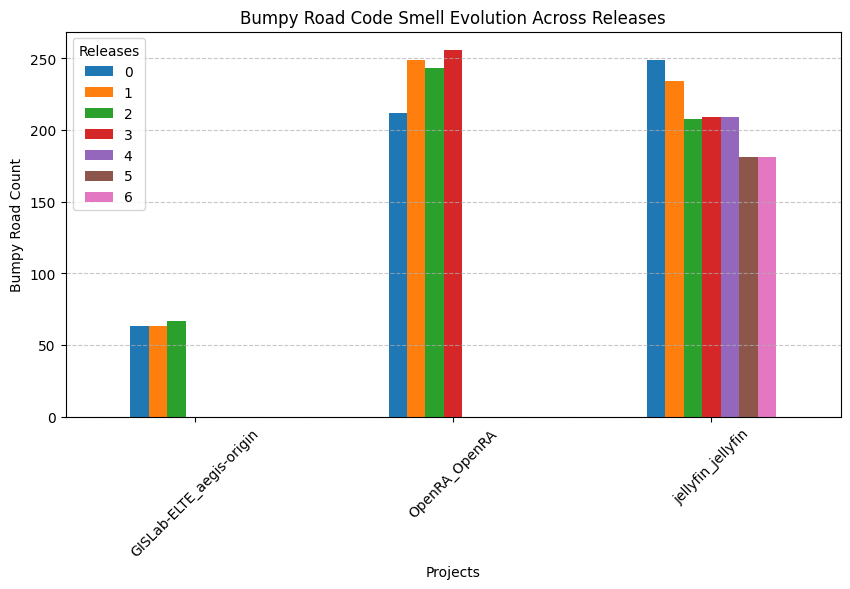

In [368]:
# Plot
plt.figure(figsize=(10, 5))
df_bumpy.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road Count")
plt.title("Bumpy Road Code Smell Evolution Across Releases")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

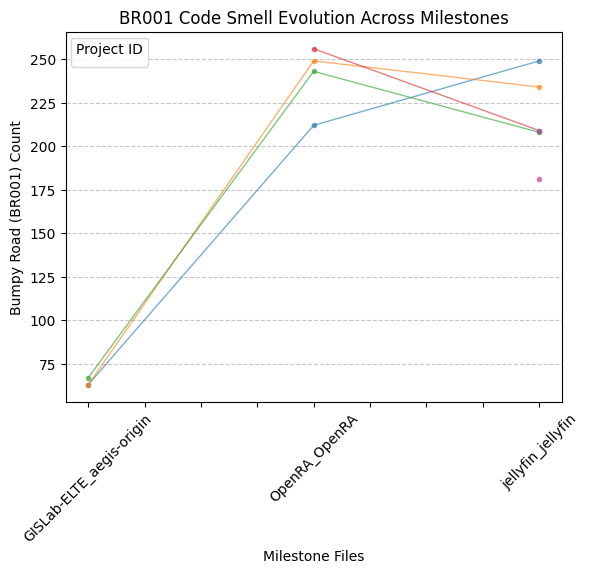

In [369]:
# Plot
plt.figure(figsize=(12, 6))
df_bumpy.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

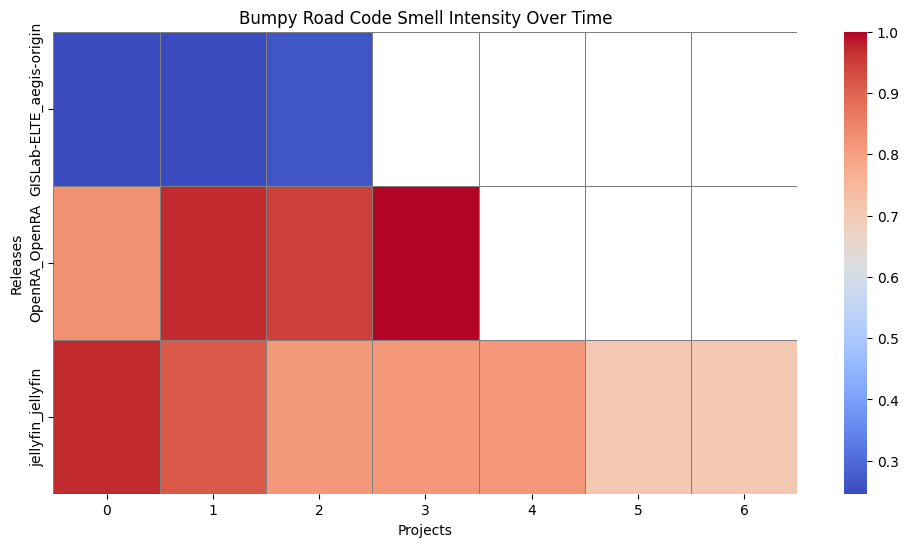

In [370]:
# Normalize values to improve visualization
df_normalized = df_bumpy / df_bumpy.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("Bumpy Road Code Smell Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

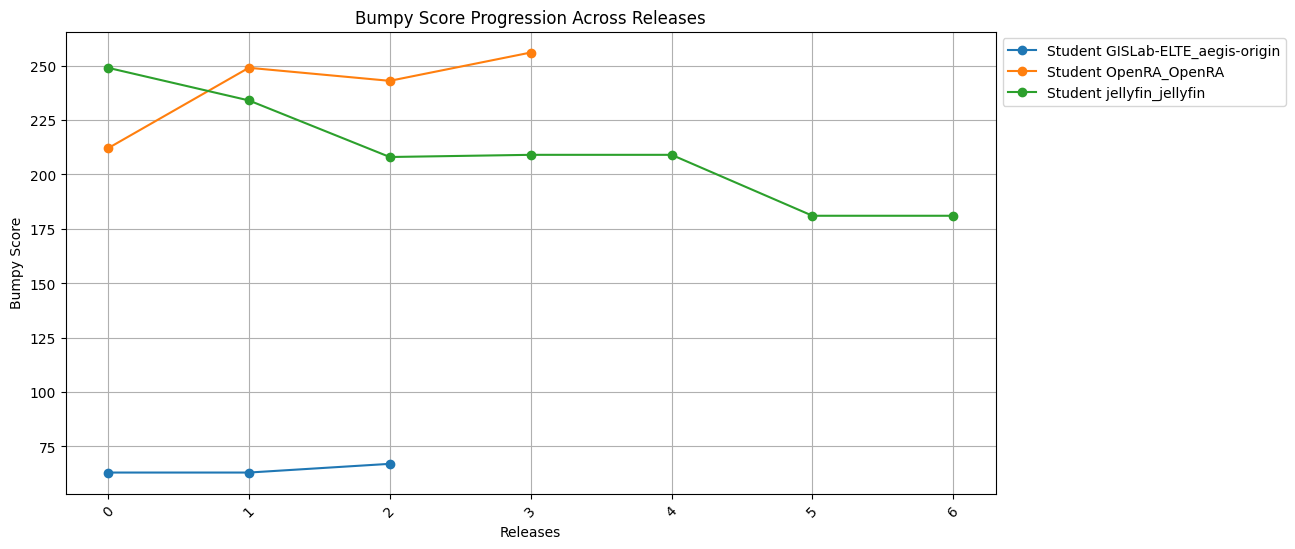

In [371]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_bumpy.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Student {student_id}")

plt.xlabel("Releases")
plt.ylabel("Bumpy Score")
plt.title("Bumpy Score Progression Across Releases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

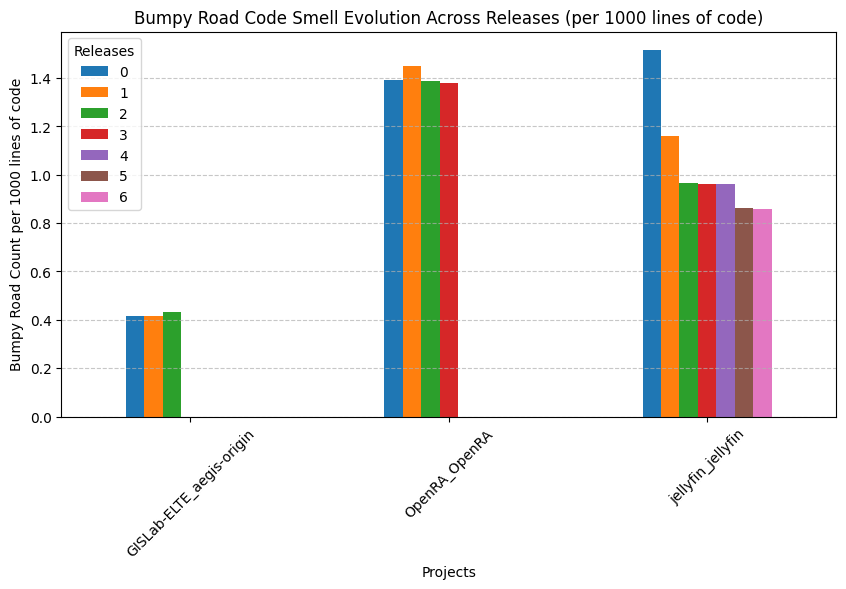

In [372]:
df_bumpy = df_bumpy / (df_bumpy.max() - df_bumpy.min())

# Plot
plt.figure(figsize=(10, 5))
df_bumpy_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road Count per 1000 lines of code")
plt.title("Bumpy Road Code Smell Evolution Across Releases (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Function parameter count
### Bar chart

<Figure size 1000x500 with 0 Axes>

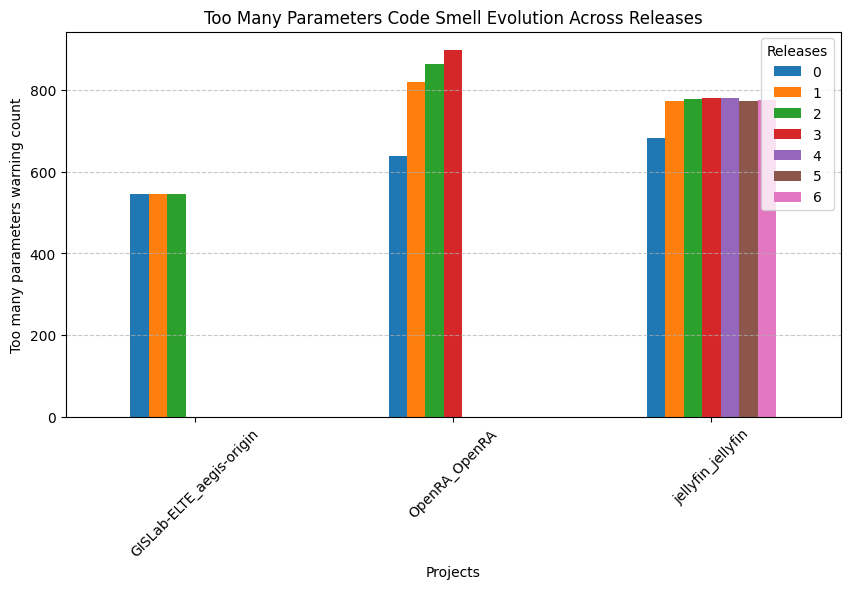

In [373]:
# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Too many parameters warning count")
plt.title("Too Many Parameters Code Smell Evolution Across Releases")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

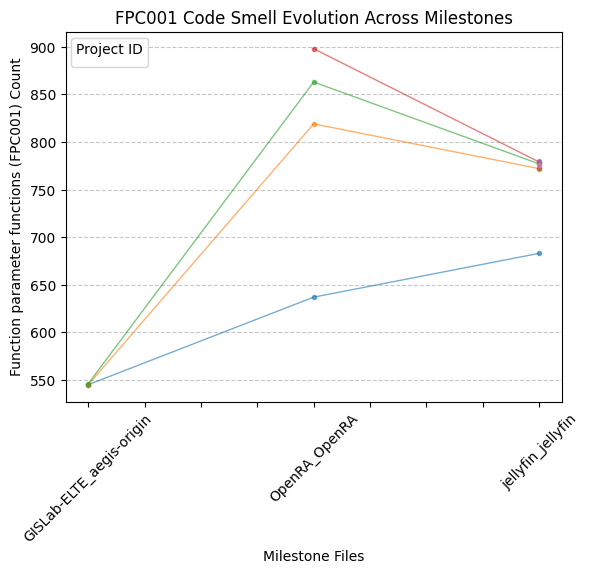

In [374]:
# Plot
plt.figure(figsize=(12, 6))
df_fpc.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

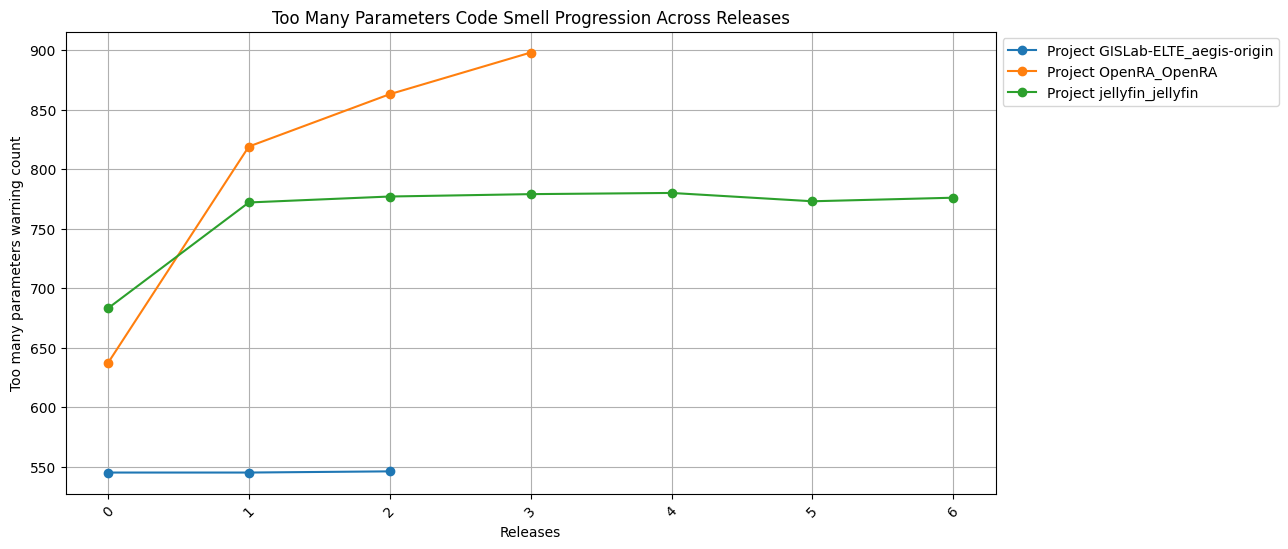

In [375]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_fpc.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Releases")
plt.ylabel("Too many parameters warning count")
plt.title("Too Many Parameters Code Smell Progression Across Releases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

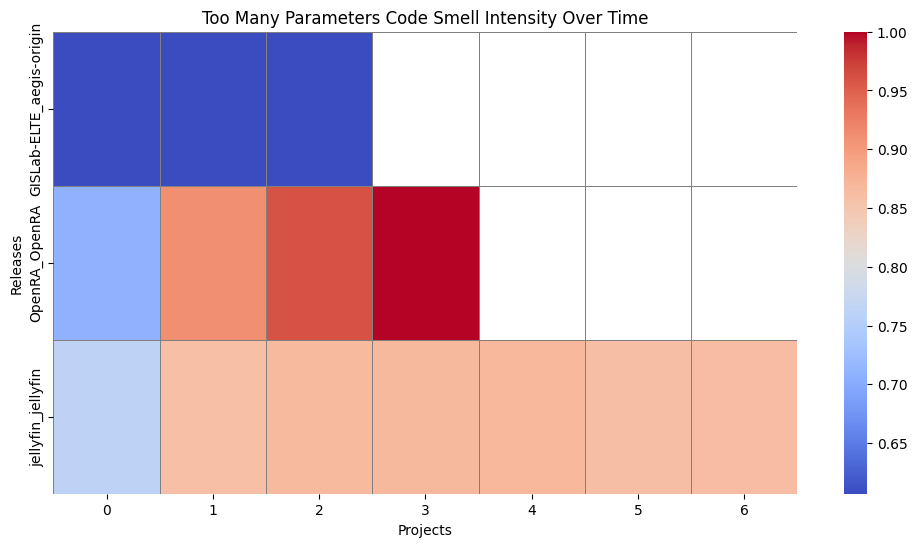

In [376]:
# Normalize values to improve visualization
df_normalized = df_fpc / df_fpc.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("Too Many Parameters Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

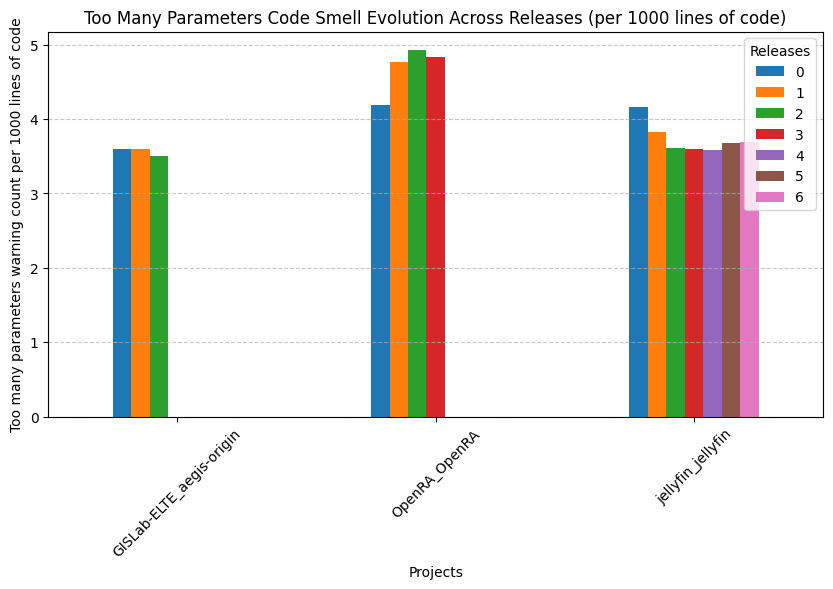

In [ ]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_fpc_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Too many parameters warning count per 1000 lines of code")
plt.title("Too Many Parameters Code Smell Evolution Across Releases (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## LCOM5

### Bar chart

<Figure size 1000x500 with 0 Axes>

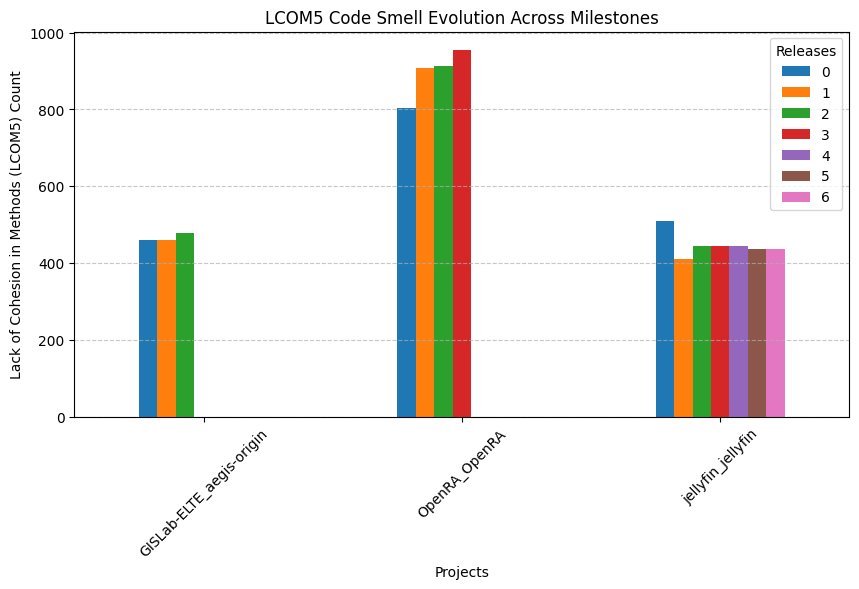

In [378]:
# Plot
plt.figure(figsize=(10, 5))
df_lcom5.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

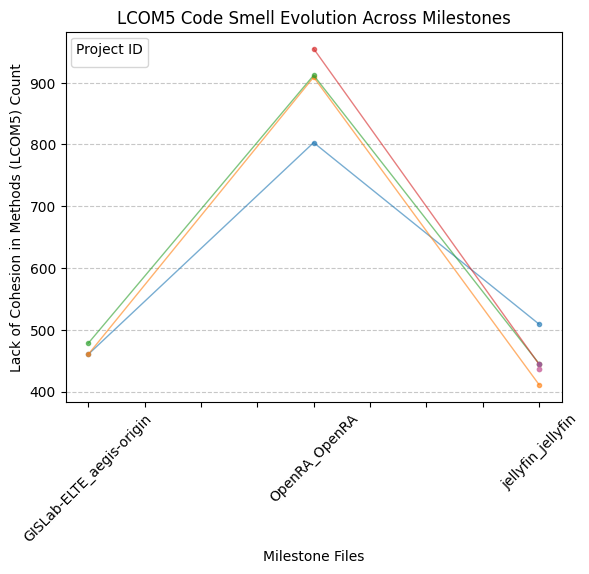

In [379]:
# Plot
plt.figure(figsize=(12, 6))
df_lcom5.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

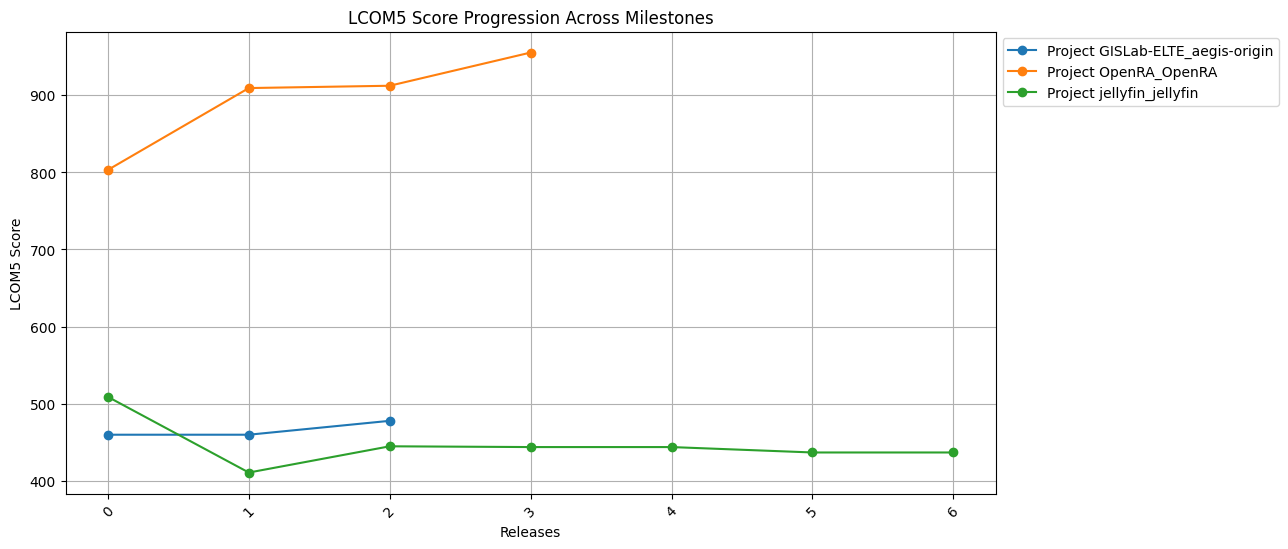

In [380]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_lcom5.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Releases")
plt.ylabel("LCOM5 Score")
plt.title("LCOM5 Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

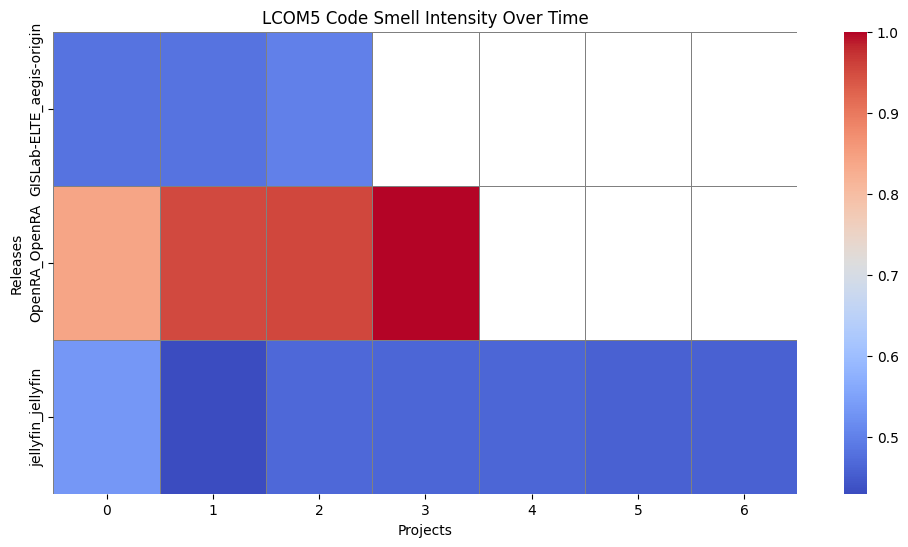

In [381]:
# Normalize values to improve visualization
df_normalized = df_lcom5 / df_lcom5.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("LCOM5 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

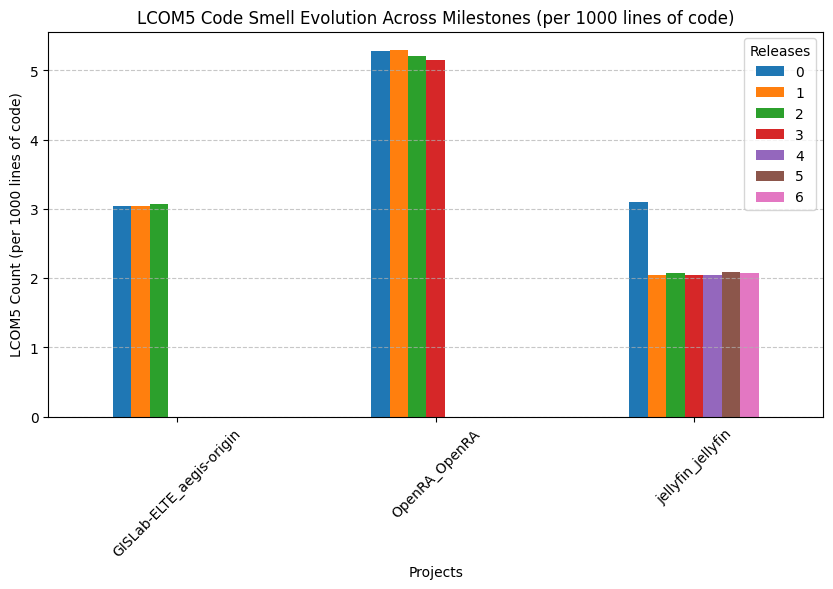

In [382]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_lcom5_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("LCOM5 Count (per 1000 lines of code)")
plt.title("LCOM5 Code Smell Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## LCOM4

### Bar chart

<Figure size 1000x500 with 0 Axes>

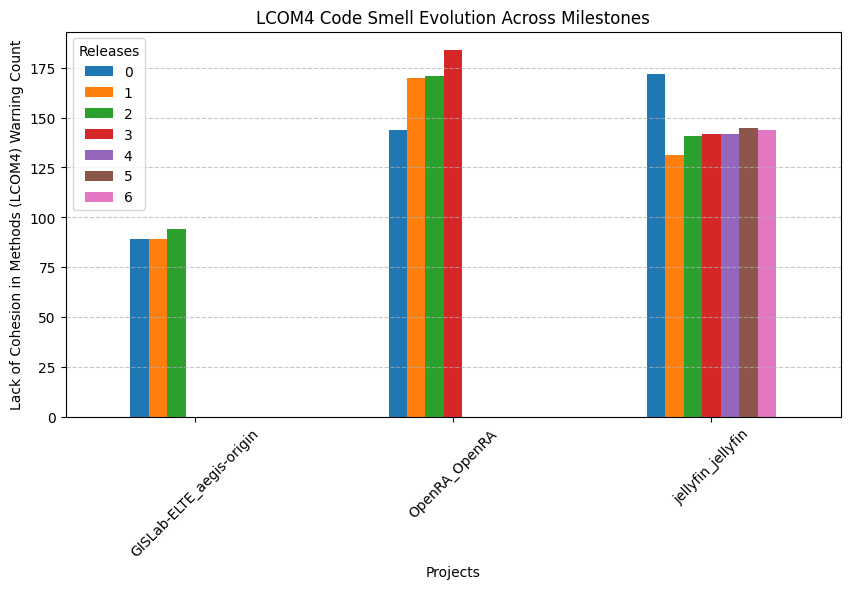

In [383]:
# Plot
plt.figure(figsize=(10, 5))
df_lcom4.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM4) Warning Count")
plt.title("LCOM4 Code Smell Evolution Across Milestones")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

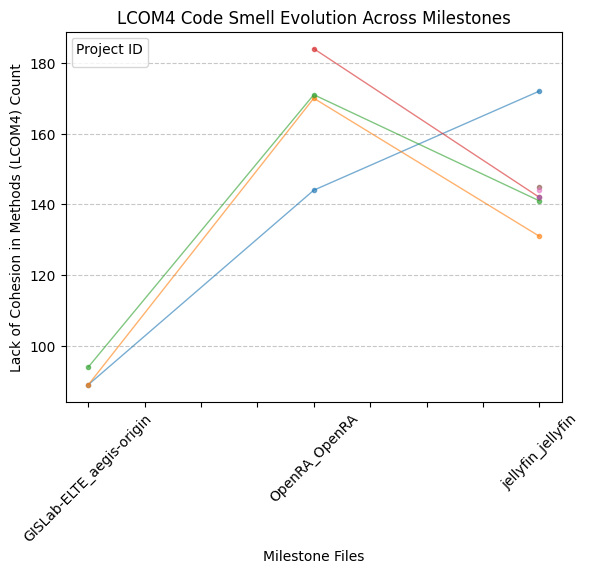

In [384]:
# Plot
plt.figure(figsize=(12, 6))
df_lcom4.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Lack of Cohesion in Methods (LCOM4) Count")
plt.title("LCOM4 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

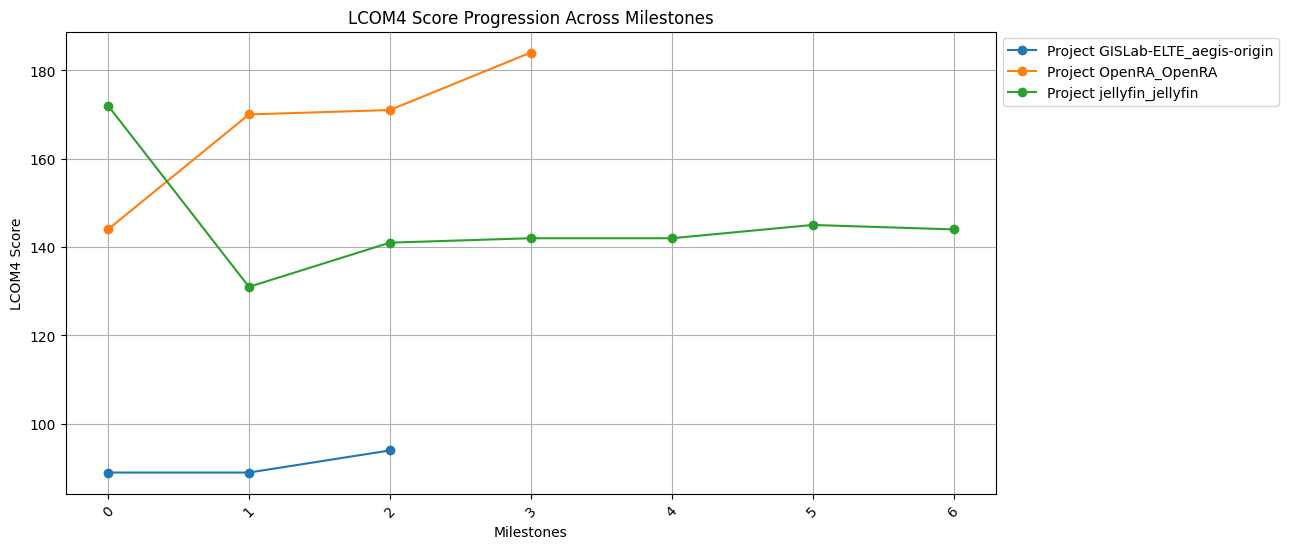

In [385]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_lcom4.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("LCOM4 Score")
plt.title("LCOM4 Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

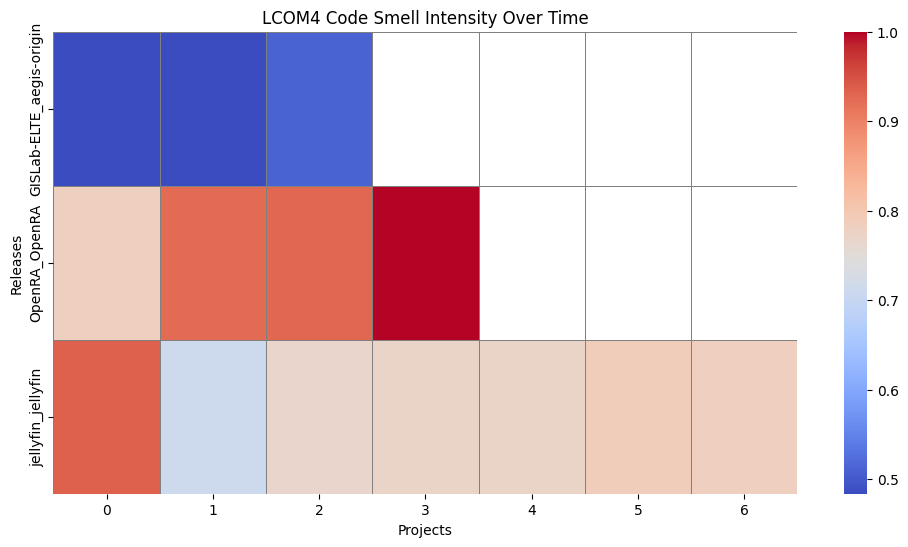

In [386]:
# Normalize values to improve visualization
df_normalized = df_lcom4 / df_lcom4.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("LCOM4 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

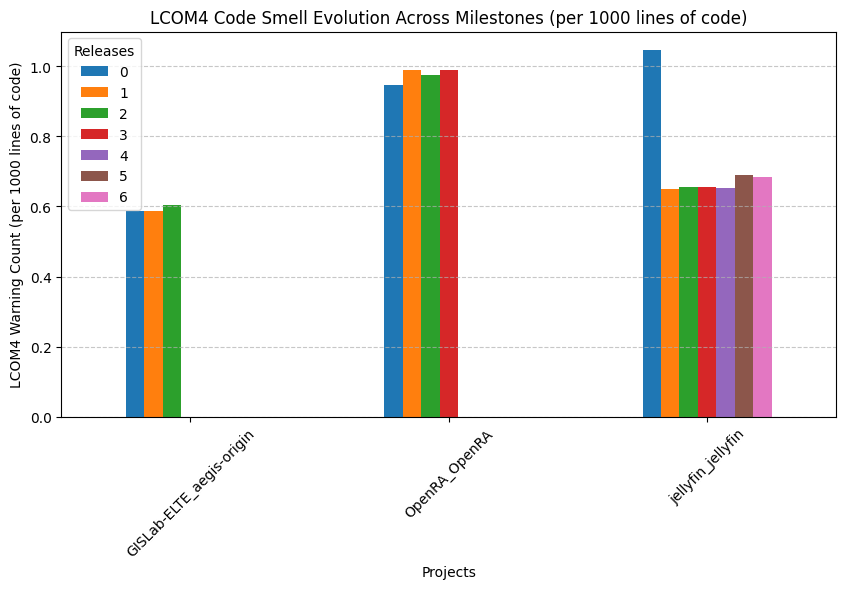

In [387]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_lcom4_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("LCOM4 Warning Count (per 1000 lines of code)")
plt.title("LCOM4 Code Smell Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()